# MARATONA BEHIND THE CODE 2020

## DESAFIO 2: PARTE 1

### Introdução

### Trabalhando com Pipelines do scikit-learn

In [1]:
# Primeiro, realizamos a instalação do scikit-learn versão 0.20.0 no Kernel deste notebook:
!pip install scikit-learn==0.20.0 --upgrade
!pip install imbalanced-learn==0.4.3

Requirement already up-to-date: scikit-learn==0.20.0 in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.20.0)


In [2]:
# Em seguida iremos importar diversas bibliotecas que serão utilizadas:

# Pacote para trabalhar com JSON
import json

# Pacote para realizar requisições HTTP
import requests

# Pacote para exploração e análise de dados
import pandas as pd

# Pacote com métodos numéricos e representações matriciais
import numpy as np

# Pacote para construção de modelo baseado na técnica Gradient Boosting
import xgboost as xgb

# Pacotes do scikit-learn para pré-processamento de dados
# "SimpleImputer" é uma transformação para preencher valores faltantes em conjuntos de dados
from sklearn.impute import SimpleImputer

# Pacotes do scikit-learn para treinamento de modelos e construção de pipelines
# Método para separação de conjunto de dados em amostras de treino e teste
from sklearn.model_selection import train_test_split
# Método para criação de modelos baseados em árvores de decisão
from sklearn.tree import DecisionTreeClassifier
# Classe para a criação de uma pipeline de machine-learning
from sklearn.pipeline import Pipeline

# Pacotes do scikit-learn para avaliação de modelos
# Métodos para validação cruzada do modelo criado
from sklearn.model_selection import KFold, cross_validate

from imblearn.over_sampling import SMOTE, ADASYN

In [3]:
# Importa os pacotes adicionais
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import seaborn as sns

### Importando um .csv de seu projeto no IBM Cloud Pak for Data para o Kernel deste notebook

In [4]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_770d9067c2564a1e9ae8537d8f217231 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Qk35RVmfpozBA9V5kq14wkyuaYB4kUfs_PnKLwHNJ5CA',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.ap-geo.objectstorage.service.networklayer.com')

body = client_770d9067c2564a1e9ae8537d8f217231.get_object(Bucket='desafio2-donotdelete-pr-rtz0g2zvtnea9n',Key='dataset_desafio_2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,MATRICULA,NOME,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL
0,502375,Márcia Illiglener,0,0,0,0,6.2,5.8,4.6,5.9,0.0,2,4,3,EXATAS
1,397093,Jason Jytereoman Izoimum,0,0,0,0,6.0,6.2,5.2,4.5,1.0,2,4,3,EXATAS
2,915288,Bartolomeu Inácio da Gama,0,0,0,0,7.3,6.7,7.1,7.2,0.0,5,0,3,HUMANAS
3,192652,Fernanda Guedes,1,3,1,1,0.0,0.0,0.0,0.0,1.0,4,4,4,DIFICULDADE
4,949491,Alessandre Borba Gomes,1,3,1,1,0.0,0.0,0.0,0.0,1.0,5,2,5,DIFICULDADE


### Explorando os dados fornecidos

Podemos continuar a exploração dos dados fornecidos com a função ``info()``:

In [5]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
MATRICULA         20000 non-null int64
NOME              20000 non-null object
REPROVACOES_DE    20000 non-null int64
REPROVACOES_EM    20000 non-null int64
REPROVACOES_MF    20000 non-null int64
REPROVACOES_GO    20000 non-null int64
NOTA_DE           20000 non-null float64
NOTA_EM           20000 non-null float64
NOTA_MF           20000 non-null float64
NOTA_GO           16284 non-null float64
INGLES            16372 non-null float64
H_AULA_PRES       20000 non-null int64
TAREFAS_ONLINE    20000 non-null int64
FALTAS            20000 non-null int64
PERFIL            20000 non-null object
dtypes: float64(5), int64(8), object(2)
memory usage: 2.3+ MB


In [6]:
df_data_1.describe()

,MATRICULA,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,16284.000000,16372.000000,20000.000000,20000.000000,20000.000000
mean,551148.271400,0.242850,0.242850,0.297650,0.293350,5.196560,5.080285,4.817630,4.534101,0.646286,5.102950,3.140300,4.060600
std,259488.766584,0.615055,0.615055,0.672813,0.661829,2.522545,2.523928,2.734775,2.509209,0.478136,4.118422,1.854909,1.674714
min,100003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,326554.250000,0.000000,0.000000,0.000000,0.000000,5.200000,4.900000,4.700000,4.500000,0.000000,2.000000,2.000000,3.000000
50%,550630.000000,0.000000,0.000000,0.000000,0.000000,6.200000,5.900000,5.500000,5.400000,1.000000,4.000000,3.000000,4.000000
75%,775524.750000,0.000000,0.000000,0.000000,0.000000,6.700000,6.700000,6.500000,6.200000,1.000000,6.000000,5.000000,6.000000
max,999995.000000,3.000000,3.000000,3.000000,3.000000,9.000000,9.400000,11.500000,10.000000,1.000000,25.000000,7.000000,8.000000


### Visualizações

Para visualizar o dataset fornecido, podemos utilizar as bibliotecas ``matplotlib`` e ``seaborn``:

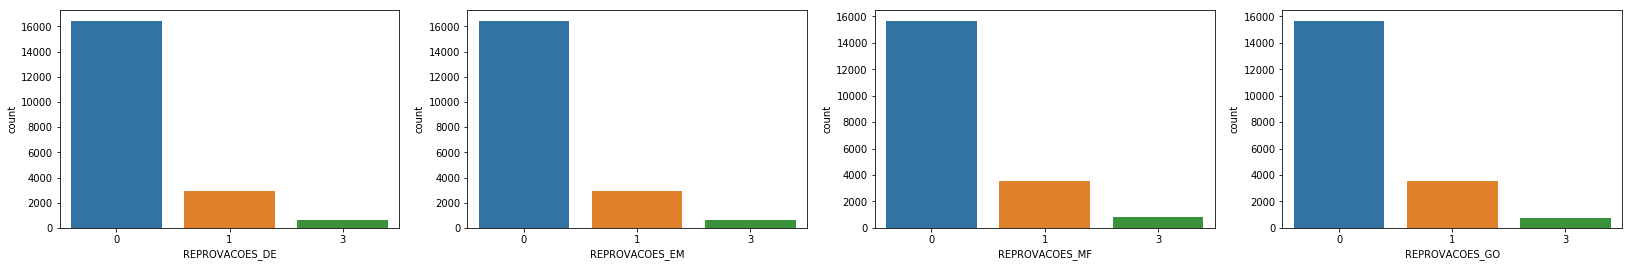

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.countplot(ax=axes[0], x='REPROVACOES_DE', data=df_data_1)
sns.countplot(ax=axes[1], x='REPROVACOES_EM', data=df_data_1)
sns.countplot(ax=axes[2], x='REPROVACOES_MF', data=df_data_1)
sns.countplot(ax=axes[3], x='REPROVACOES_GO', data=df_data_1)

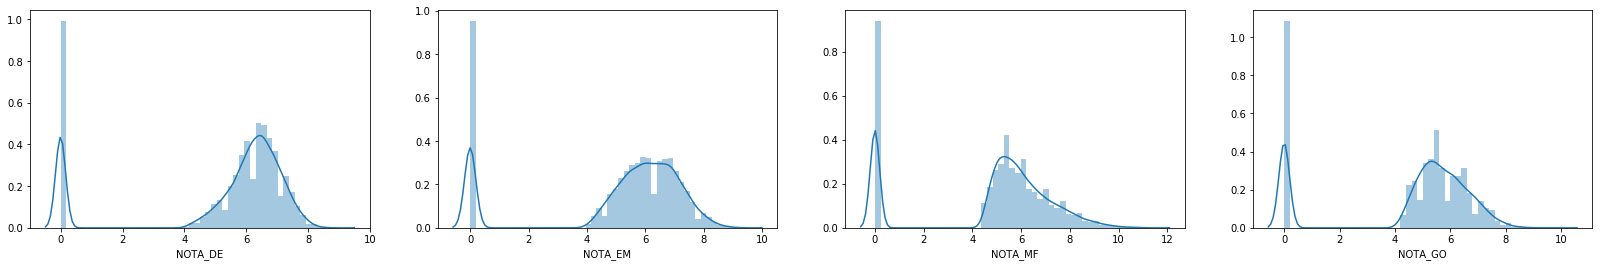

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.distplot(df_data_1['NOTA_DE'], ax=axes[0])
sns.distplot(df_data_1['NOTA_EM'], ax=axes[1])
sns.distplot(df_data_1['NOTA_MF'], ax=axes[2])
sns.distplot(df_data_1['NOTA_GO'].dropna(), ax=axes[3])

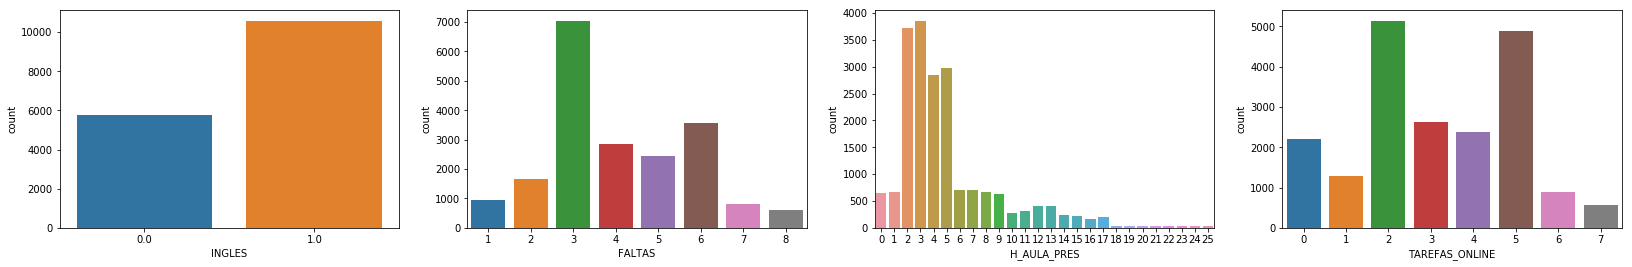

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.countplot(ax=axes[0], x='INGLES', data=df_data_1)
sns.countplot(ax=axes[1], x='FALTAS', data=df_data_1)
sns.countplot(ax=axes[2], x='H_AULA_PRES', data=df_data_1)
sns.countplot(ax=axes[3], x='TAREFAS_ONLINE', data=df_data_1)

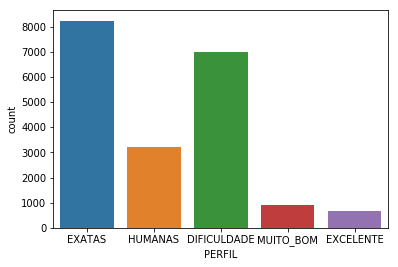

In [10]:
fig = plt.plot()
sns.countplot(x='PERFIL', data=df_data_1)

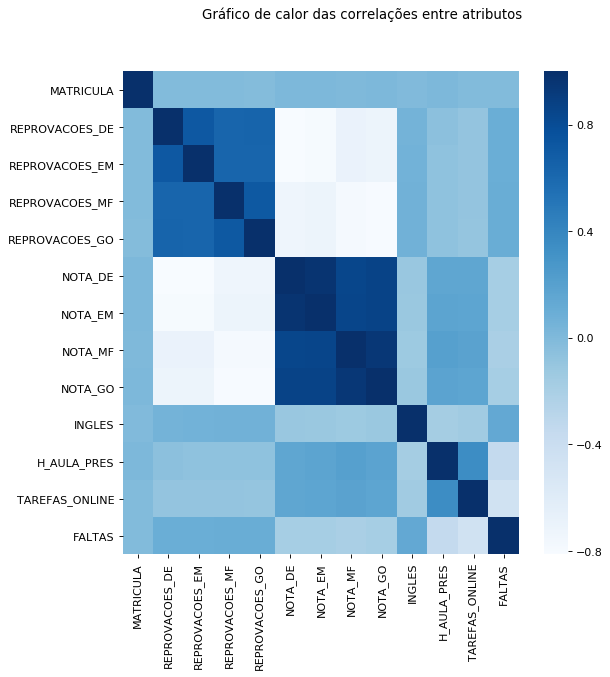

In [11]:
#faz o cálculo das correlações entre as variáveis
plt.subplots(ncols=1, nrows=1, figsize=(8, 8), dpi=80, facecolor='w')
plt.suptitle('Gráfico de calor das correlações entre atributos')
sns.heatmap(df_data_1.corr(), annot=False, cmap='Blues')

### Realizando o pré-processamento dos dados

In [12]:
# Visualizando os dados faltantes do dataset inicial
print("Valores nulos antes da transformação SimpleImputer: \n\n{}\n".format(df_data_1.isnull().sum(axis = 0)))

Valores nulos antes da transformação SimpleImputer: 

MATRICULA            0
NOME                 0
REPROVACOES_DE       0
REPROVACOES_EM       0
REPROVACOES_MF       0
REPROVACOES_GO       0
NOTA_DE              0
NOTA_EM              0
NOTA_MF              0
NOTA_GO           3716
INGLES            3628
H_AULA_PRES          0
TAREFAS_ONLINE       0
FALTAS               0
PERFIL               0
dtype: int64



In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# All sklearn Transforms must have the `transform` and `fit` methods
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Primeiro realizamos a cópia do dataframe 'X' de entrada
        data = X.copy()
        # Retornamos um novo dataframe sem as colunas indesejadas
        return data.drop(labels=self.columns, axis='columns')
    
#Preenche o campo indicado (coluna) com o valor desejado    
class FillWith(BaseEstimator, TransformerMixin):
    def __init__(self, column, value):
        self.column = column
        self.value = value

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Primeiro realizamos a cópia do dataframe 'X' de entrada
        data = X.copy()
        #faz a inclusão do valor recebido quando o campo for NaN
        data[self.column] = data[self.column].fillna(self.value)  # insere valor recebido quando não tem a informação
        # Retornamos um novo dataframe
        return data     
    

    
#cria uma coluna com média geral das notas
class MediaGeral(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        def AvaliaCaso(nota_de, nota_em, nota_mf, nota_go):
            conta = 0
            valores = 0
            if nota_de > 0 and not pd.isna(nota_de):
                conta += 1
                valores += nota_de
            if nota_em > 0 and not pd.isna(nota_em):
                conta += 1
                valores += nota_em
            if nota_mf > 0 and not pd.isna(nota_mf):
                conta += 1
                valores += nota_mf
            if nota_go > 0 and not pd.isna(nota_go):
                conta += 1
                valores += nota_go
            if conta > 0:    
                media = valores / conta
            else:
                media = 0
            return media
        
        # Primeiro realizamos a cópia do dataframe 'X' de entrada
        data = X.copy()
        #faz a criação da coluna "MEDIA_GERAL" 
        data['MEDIA_GERAL'] = data.apply(lambda x: AvaliaCaso(x.NOTA_DE, x.NOTA_EM, x.NOTA_MF, x.NOTA_GO), axis=1)
        # Retornamos um novo dataframe
        return data     
    
    
#Altera nota quando está NaN ou 0 e limita a nota em 10
class NotaUnica(BaseEstimator, TransformerMixin):
    def __init__(self, qual):
        self.qual = qual
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        #def AvaliaNota(faltoso, nota_media, qual, nota):
        def AvaliaNota(nota_media, qual, nota):    
            #verifica se nota é 0 ou NaN
            if pd.isna(nota) or nota == 0:
                if nota_media > 0:
                    nota = 10
                else:
                    nota = 0
            elif nota > 10:    
              nota = 10
            return nota
        
        # Primeiro realizamos a cópia do dataframe 'X' de entrada
        data = X.copy()
        #faz verificação se a nota é 0 ou NaN e coloca novo valor
        #data[self.qual] = data.apply(lambda x: AvaliaNota(x.FALTOSO, x.MEDIA_GERAL, self.qual, x[self.qual]), axis=1)
        data[self.qual] = data.apply(lambda x: AvaliaNota(x.MEDIA_GERAL, self.qual, x[self.qual]), axis=1)
        # Retornamos um novo dataframe
        return data     
    
    
#cria uma coluna com TRUE para os TUDO ZERO e FALSE para os demais    
class Dificuldade(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Primeiro realizamos a cópia do dataframe 'X' de entrada
        data = X.copy()
        #faz a criação da coluna "DIFICULDADE" 
        data['DIFICULDADE'] = data.apply(lambda x: True if (x['MEDIA_GERAL'] == 0) else False, axis=1)
        # Retornamos um novo dataframe
        return data    

    
#transforma um campo em determinado tipo
class TrocaTipo(BaseEstimator, TransformerMixin):
    def __init__(self, coluna, tipo):
        self.coluna = coluna
        self.tipo = tipo
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Primeiro realizamos a cópia do dataframe 'X' de entrada
        data = X.copy()
        # faz a transformação do tipo da coluna
        data[self.coluna] = data[self.coluna].astype(self.tipo) 
        # Retornamos um novo dataframe
        return data 
    

#executa o SMOTE
class ExecutaSmote(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Definição das colunas que serão features (nota-se que a coluna NOME não está presente)
        features = [
            'REPROVACOES_DE', 'REPROVACOES_EM', "REPROVACOES_MF", "REPROVACOES_GO",
            "NOTA_DE", "NOTA_EM", "NOTA_MF", "NOTA_GO",
            "INGLES", "TAREFAS_ONLINE", 'H_AULA_PRES', 'FALTAS'
        ]
        # Definição da variável-alvo
        target = ["PERFIL"]
        data = X.copy()
        
        # Preparação dos argumentos para os métodos da biblioteca ``scikit-learn``
        X_inicial = X[features]
        y_inicial = X[target]
        
        X_apoio, y = SMOTE().fit_sample(X_inicial, y_inicial.values.ravel())
        y_apoio = pd.DataFrame(y, columns=target)
        X_saida = pd.DataFrame(X_apoio, columns=X_inicial.columns)
        data = pd.merge(X_saida, y_apoio, left_index=True, right_index=True)
        
        # Retornamos um novo dataframe
        return data    

In [14]:
# Visualizando as colunas do dataset original
print("Colunas do dataset original: \n")
print(df_data_1.columns)

Colunas do dataset original: 

Index(['MATRICULA', 'NOME', 'REPROVACOES_DE', 'REPROVACOES_EM',
       'REPROVACOES_MF', 'REPROVACOES_GO', 'NOTA_DE', 'NOTA_EM', 'NOTA_MF',
       'NOTA_GO', 'INGLES', 'H_AULA_PRES', 'TAREFAS_ONLINE', 'FALTAS',
       'PERFIL'],
      dtype='object')


In [15]:
#copia para outro nome
df_data_2 = df_data_1.copy()

In [16]:
# Instanciando uma transformação DropColumns
rm_columns = DropColumns(
    columns=["NOME", "MATRICULA"]  # Essa transformação recebe como parâmetro uma lista com os nomes das colunas indesejadas
)

print(rm_columns)

DropColumns(columns=['NOME', 'MATRICULA'])


In [17]:
# Aplicando a transformação ``DropColumns`` ao conjunto de dados base
rm_columns.fit(X=df_data_2)

# Reconstruindo um DataFrame Pandas com o resultado da transformação
df_data_2 = pd.DataFrame.from_records(
    data=rm_columns.transform(
        X=df_data_2
    ),
)

In [18]:
# Visualizando as colunas do dataset transformado
print("Colunas do dataset após a transformação ``DropColumns``: \n")
print(df_data_2.columns)

Colunas do dataset após a transformação ``DropColumns``: 

Index(['REPROVACOES_DE', 'REPROVACOES_EM', 'REPROVACOES_MF', 'REPROVACOES_GO',
       'NOTA_DE', 'NOTA_EM', 'NOTA_MF', 'NOTA_GO', 'INGLES', 'H_AULA_PRES',
       'TAREFAS_ONLINE', 'FALTAS', 'PERFIL'],
      dtype='object')


In [ ]:
#Campo Inglês
# Instanciando um ajuste FillWOne
fillwith = FillWith(
    column="INGLES",  # Essa transformação recebe como parâmetro o nome da coluna a tratar,
    value=1 #preenche com 1 (não sabe inglês) quando vazio
)

print(fillwith)

FillWith(column='INGLES', value=1)


In [ ]:
# Aplicando a transformação ``FillWOne`` ao conjunto de dados base
fillwith.fit(X=df_data_2)

# Reconstruindo um DataFrame Pandas com o resultado da transformação
df_data_2 = pd.DataFrame.from_records(
    data=fillwith.transform(
        X=df_data_2
    ),
)

In [ ]:
#depois de removidos os NaN transforma coluna INGLES em Inteiro
#df_data_2.INGLES = df_data_2.INGLES.astype('int64') 

trocatipo = TrocaTipo(
    coluna = "INGLES",
    tipo = "int64"
)

# Reconstruindo um DataFrame Pandas com o resultado da transformação
df_data_2 = pd.DataFrame.from_records(
    data=trocatipo.transform(
        X=df_data_2
    ),
)

In [ ]:
#Ajustando nota zero ou NaN individualmente
mediageral = MediaGeral()
mediageral.fit(X=df_data_2)

# Reconstruindo um DataFrame Pandas com o resultado da transformação
df_data_2 = pd.DataFrame.from_records(
    data=mediageral.transform(
        X=df_data_2
    ),
)

In [ ]:
# Ajustando nota zerada DE
notaUnica = NotaUnica(
    qual = "NOTA_EM"
)
notaUnica.fit(X=df_data_2)

# Reconstruindo um DataFrame Pandas com o resultado da transformação
df_data_2 = pd.DataFrame.from_records(
    data=notaUnica.transform(
        X=df_data_2
    ),
)

In [ ]:
# Ajustando nota zerada DE
notaUnica = NotaUnica(
    qual = "NOTA_DE"
)
notaUnica.fit(X=df_data_2)

# Reconstruindo um DataFrame Pandas com o resultado da transformação
df_data_2 = pd.DataFrame.from_records(
    data=notaUnica.transform(
        X=df_data_2
    ),
)

In [ ]:
# Ajustando nota zerada DE
notaUnica = NotaUnica(
    qual = "NOTA_MF"
)
notaUnica.fit(X=df_data_2)

# Reconstruindo um DataFrame Pandas com o resultado da transformação
df_data_2 = pd.DataFrame.from_records(
    data=notaUnica.transform(
        X=df_data_2
    ),
)

In [ ]:
# Ajustando nota zerada DE
notaUnica = NotaUnica(
    qual = "NOTA_GO"
)
notaUnica.fit(X=df_data_2)

# Reconstruindo um DataFrame Pandas com o resultado da transformação
df_data_2 = pd.DataFrame.from_records(
    data=notaUnica.transform(
        X=df_data_2
    ),
)

Aqui tem uma falha teórica. A média é calculada antes do ajuste individual para ter a média. Mas se uma das notas fooi corrigida, a média é outra...

In [ ]:
# Aplicando a criação do campo ``Dificuldade`` ao conjunto de dados base
dificuldade = Dificuldade()
dificuldade.fit(X=df_data_2)

# Reconstruindo um DataFrame Pandas com o resultado da transformação
df_data_2 = pd.DataFrame.from_records(
    data=dificuldade.transform(
        X=df_data_2
    ),
)

In [ ]:
# Visualizando os dados faltantes do dataset antes de finalizar com inputer
print("Valores nulos no dataset após a transformação SimpleImputer: \n\n{}\n".format(df_data_2.isnull().sum(axis = 0)))

Valores nulos no dataset após a transformação SimpleImputer: 

REPROVACOES_DE    0
REPROVACOES_EM    0
REPROVACOES_MF    0
REPROVACOES_GO    0
NOTA_DE           0
NOTA_EM           0
NOTA_MF           0
NOTA_GO           0
INGLES            0
H_AULA_PRES       0
TAREFAS_ONLINE    0
FALTAS            0
PERFIL            0
MEDIA_GERAL       0
DIFICULDADE       0
dtype: int64



Roda apenas por garantia, caso tenha sobrado algum valor nulo

In [ ]:
# Criação de um objeto ``SimpleImputer``
si = SimpleImputer(
    missing_values=np.nan,  # os valores faltantes são do tipo ``np.nan`` (padrão Pandas)
    strategy='constant',  # a estratégia escolhida é a alteração do valor faltante por uma constante
    fill_value=0,  # a constante que será usada para preenchimento dos valores faltantes é um int64=0.
    verbose=0,
    copy=True
)

In [ ]:
# Aplicamos o SimpleImputer ``si`` ao conjunto de dados df_data_2 (resultado da primeira transformação)
si.fit(X=df_data_2)

# Reconstrução de um novo DataFrame Pandas com o conjunto imputado (df_data_3)
df_data_2 = pd.DataFrame.from_records(
    data=si.transform(
        X=df_data_2
    ),  # o resultado SimpleImputer.transform(<<pandas dataframe>>) é lista de listas
    columns=df_data_2.columns  # as colunas originais devem ser conservadas nessa transformação
)

In [ ]:
# Aplica o SMOTE no dataset
executasmote = ExecutaSmote()
executasmote.fit(X=df_data_2)
# Reconstruindo um DataFrame Pandas com o resultado da transformação
df_data_2 = pd.DataFrame.from_records(
    data=executasmote.transform(
        X=df_data_2
    ),
)

In [ ]:
print(len(df_data_2))
print(df_data_2.head())
print(df_data_2.tail())

41150
   REPROVACOES_DE  REPROVACOES_EM  REPROVACOES_MF  REPROVACOES_GO  NOTA_DE  \
0             0.0             0.0             0.0             0.0      6.2   
1             0.0             0.0             0.0             0.0      6.0   
2             0.0             0.0             0.0             0.0      7.3   
3             1.0             3.0             1.0             1.0      0.0   
4             1.0             3.0             1.0             1.0      0.0   

   NOTA_EM  NOTA_MF  NOTA_GO  INGLES  TAREFAS_ONLINE  H_AULA_PRES  FALTAS  \
0      5.8      4.6      5.9     0.0             4.0          2.0     3.0   
1      6.2      5.2      4.5     1.0             4.0          2.0     3.0   
2      6.7      7.1      7.2     0.0             0.0          5.0     3.0   
3      0.0      0.0      0.0     1.0             4.0          4.0     4.0   
4      0.0      0.0      0.0     1.0             2.0          5.0     5.0   

        PERFIL  
0       EXATAS  
1       EXATAS  
2      HUMA

In [ ]:
# Visualizando os dados faltantes do dataset após a primeira transformação (df_data_2)
print("Valores nulos antes da transformação SimpleImputer: \n\n{}\n".format(df_data_2.isnull().sum(axis = 0)))

Valores nulos antes da transformação SimpleImputer: 

REPROVACOES_DE    0
REPROVACOES_EM    0
REPROVACOES_MF    0
REPROVACOES_GO    0
NOTA_DE           0
NOTA_EM           0
NOTA_MF           0
NOTA_GO           0
INGLES            0
TAREFAS_ONLINE    0
H_AULA_PRES       0
FALTAS            0
PERFIL            0
dtype: int64



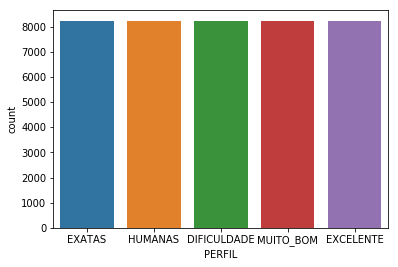

In [ ]:
fig = plt.plot()
sns.countplot(x='PERFIL', data=df_data_2)

In [ ]:
# faz cópia do dataframe
df_data_3 = df_data_2.copy()

In [ ]:
# Visualizando os dados faltantes do dataset após a segunda transformação (SimpleImputer) (df_data_3)
print("Valores nulos no dataset após a transformação SimpleImputer: \n\n{}\n".format(df_data_3.isnull().sum(axis = 0)))

Valores nulos no dataset após a transformação SimpleImputer: 

REPROVACOES_DE    0
REPROVACOES_EM    0
REPROVACOES_MF    0
REPROVACOES_GO    0
NOTA_DE           0
NOTA_EM           0
NOTA_MF           0
NOTA_GO           0
INGLES            0
TAREFAS_ONLINE    0
H_AULA_PRES       0
FALTAS            0
PERFIL            0
dtype: int64



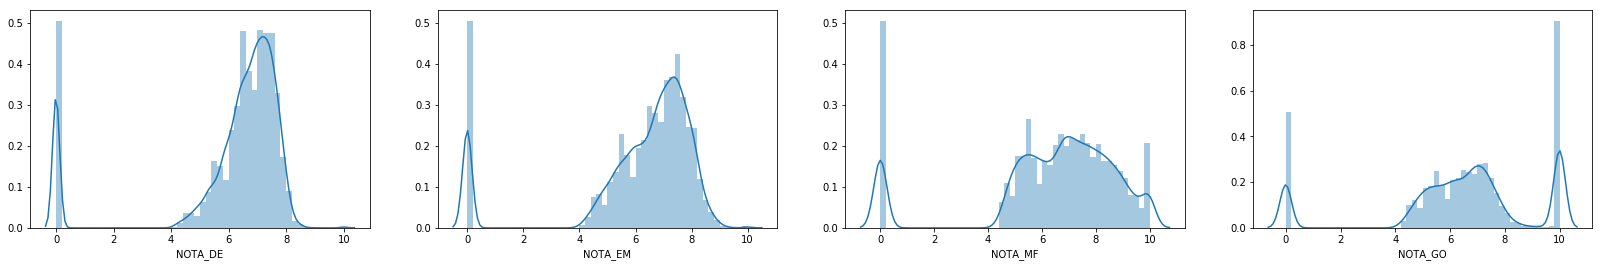

In [ ]:
# Avalia notas depois das transformações
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.distplot(df_data_3['NOTA_DE'], ax=axes[0])
sns.distplot(df_data_3['NOTA_EM'], ax=axes[1])
sns.distplot(df_data_3['NOTA_MF'], ax=axes[2])
sns.distplot(df_data_3['NOTA_GO'], ax=axes[3])

Nota-se que não temos mais nenhum valor faltante no nosso conjunto de dados :)

Vale salientar que nem sempre a alteração dos valores faltantes por 0 é a melhor estratégia. O participante é incentivado a estudar e implementar estratégias diferentes de tratamento dos valores faltantes para aprimorar seu modelo e melhorar sua pontuação final.

### Treinando um modelo de classificação

Finalizado o pré-processamento, já temos o conjunto de dados no formato necessário para o treinamento do nosso modelo:

In [ ]:
df_data_3.head()

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,TAREFAS_ONLINE,H_AULA_PRES,FALTAS,PERFIL
0,0.0,0.0,0.0,0.0,6.2,5.8,4.6,5.9,0.0,4.0,2.0,3.0,EXATAS
1,0.0,0.0,0.0,0.0,6.0,6.2,5.2,4.5,1.0,4.0,2.0,3.0,EXATAS
2,0.0,0.0,0.0,0.0,7.3,6.7,7.1,7.2,0.0,0.0,5.0,3.0,HUMANAS
3,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,DIFICULDADE
4,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,5.0,DIFICULDADE


No exemplo fornecido, iremos utilizar todas as colunas, exceto a coluna **LABELS** como *features* (variáveis de entrada).

A variável **LABELS** será a variável-alvo do modelo, conforme descrito no enunciado do desafio.

#### Definindo as features do modelo

In [ ]:
# Definição das colunas que serão features (nota-se que a coluna NOME não está presente)
features = [
    'REPROVACOES_DE', 'REPROVACOES_EM', "REPROVACOES_MF", "REPROVACOES_GO",
    "NOTA_DE", "NOTA_EM", "NOTA_MF", "NOTA_GO",
    "INGLES", "TAREFAS_ONLINE", 'H_AULA_PRES', 'FALTAS'
]

# Definição da variável-alvo
target = ["PERFIL"]

# Preparação dos argumentos para os métodos da biblioteca ``scikit-learn``
X = df_data_3[features]
y = df_data_3[target]

O conjunto de entrada (X):

In [ ]:
X.head()

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,TAREFAS_ONLINE,H_AULA_PRES,FALTAS
0,0.0,0.0,0.0,0.0,6.2,5.8,4.6,5.9,0.0,4.0,2.0,3.0
1,0.0,0.0,0.0,0.0,6.0,6.2,5.2,4.5,1.0,4.0,2.0,3.0
2,0.0,0.0,0.0,0.0,7.3,6.7,7.1,7.2,0.0,0.0,5.0,3.0
3,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0
4,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,5.0


As variáveis-alvo correspondentes (y):

In [ ]:
y.head()

,PERFIL
0,EXATAS
1,EXATAS
2,HUMANAS
3,DIFICULDADE
4,DIFICULDADE


# Seleção de variáveis baseada no classificador

In [ ]:
#cria função para avaliar importância
def etc_importances(features_interna, outcome_interna, n_estimators):
  model = RandomForestClassifier(n_estimators=n_estimators, random_state=0, n_jobs=-1, criterion='entropy', verbose=0)
  model.fit(features_interna, np.array(outcome_interna).ravel())

  importances = model.feature_importances_
  variables = np.array(features_interna.columns)
  indices = np.argsort(importances)[::-1] #tudo, em ordem decrescente
  importances = importances[indices]
  variables = variables[indices]

  return variables, importances

In [ ]:
variables, importances = etc_importances(X, y, n_estimators=262)

In [ ]:
#cria função para plotar importâncias x variáveis acumulado
def sum_and_plot_importances(variables, importances):
  sum_importances = pd.DataFrame()
  for i in range(importances.size):
    sum_importance = importances[:(i+1)].sum() #soma todas as colunas anteriores a i
    this_variable = pd.Series([variables[i], sum_importance, importances[i]])
    sum_importances = sum_importances.append(this_variable, ignore_index=True)
  plt.scatter(sum_importances.index, sum_importances.iloc[:,1])
  return sum_importances

In [ ]:
#plota a importância das variáveis
sum_importances = sum_and_plot_importances(variables, importances)

In [ ]:
#mostra a ordem e a importância das variáveis no cálculo final, sendo a primeira a mais importante e a última a menos significativa
sum_importances

#### Separando o dataset em um conjunto de treino e um conjunto de teste


Iremos separar o dataset fornecido em dois grupos: um para treinar nosso modelo, e outro para testarmos o resultado através de um teste cego. A separação do dataset pode ser feita facilmente com o método *train_test_split()* do scikit-learn:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=337)

In [ ]:
print("Tamanho arquivo treino:", len(X_train))
print("Tamanho arquivo teste:", len(X_test))

#### Criando um modelo baseado em árvores de decisão

No exemplo fornecido iremos criar um classificador baseado em **árvores de decisão**.

O primeiro passo é basicamente instanciar um objeto *DecisionTreeClassifier()* da biblioteca scikit-learn.

In [ ]:
# Criação da árvore de decisão com a biblioteca ``scikit-learn``:
dtc_model = RandomForestClassifier(criterion='gini', max_depth= 40, max_features='auto', n_estimators= 262)

#### Execução do evento de treino de uma árvore de decisão

In [ ]:
# Treino do modelo (é chamado o método *fit()* com os conjuntos de treino)
dtc_model.fit(
    X_train,
    y_train.values.ravel()
)

#### Execução de predições e avaliação do modelo criado

In [ ]:
# Realização de teste cego no modelo criado
y_pred = dtc_model.predict(X_test)

In [ ]:
X_test.head()

In [ ]:
print(y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

# Acurácia alcançada pela árvore de decisão
print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred), 2)))

In [ ]:
#avaliando com a matrix de confusão
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

<hr>